In [1]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
import xarray as xr

from cimr.data.training_data import CIMRDataset, CIMRSequenceDataset

In [2]:
from torch.utils.data import DataLoader

start_time = np.datetime64("2020-05-01T00:00:00")
end_time = np.datetime64("2020-05-02T00:00:00")
training_data = CIMRDataset("/home/simonpf/data_3/cimr/training_data/", start_time=start_time, end_time=end_time, window_size=64, sequence_length=8, sample_rate=1)
training_loader = DataLoader(training_data, num_workers=8, batch_size=4, shuffle=True)

start_time = np.datetime64("2020-05-01T00:00:00")
end_time = np.datetime64("2020-05-02T00:00:00")
validation_data = CIMRDataset("/home/simonpf/data_3/cimr/training_data/", start_time=start_time, end_time=end_time, window_size=64, sequence_length=8)
validation_loader = DataLoader(validation_data, num_workers=4, batch_size=4, shuffle=True)

In [3]:
from cimr.models import CIMRSeviri, CIMRSeqSeviri
#model = CIMRSeviri(n_stages=3, features=32, n_outputs=64)
model = CIMRSeqSeviri(n_stages=3, features=64, n_outputs=64)

In [4]:
x, y = next(iter(training_loader))

/home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
/usr/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/rasterio/../../.././libtiledb.so.2.8)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
/usr/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/rasterio/../../.././libtiledb.so.2.8)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
/usr/lib/x86_64-linux-gnu/libstdc++.so

In [5]:
from cimr.models import CIMRSmol
from quantnn.qrnn import QRNN

quantiles = np.linspace(0, 1, 66)[1:-1]
qrnn = QRNN(quantiles=quantiles, model=model)

In [7]:
import torch
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer=optimizer, T_max=10)
model.train(False)

qrnn.train(
    training_data=training_loader,
    validation_data=validation_loader,
    n_epochs=10,
    device="cuda",
    mask=-100,
    optimizer=optimizer,
    scheduler=scheduler
)

/home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
/usr/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/rasterio/../../.././libtiledb.so.2.8)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
/usr/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/rasterio/../../.././libtiledb.so.2.8)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
/usr/lib/x86_64-linux-gnu/libstdc++.so

Output()

                                                          
                                                          
                     Training history                     
                                                          
                                                          
       Epoch         Training loss      Validation loss   
 ──────────────────────────────────────────────────────── 
     #      LR           Total               Total        
                                                          
      1   0.1000         10.844             10.830        
      2   0.0976         10.815             10.790        
      3   0.0905         10.587             10.038        
      4   0.0794         8.727               7.286        
      5   0.0655         6.718               6.371        
      6   0.0500         6.300               6.224        
      7   0.0345         6.182               6.141        
      8   0.0206         6.128               6.093        
      9   0.0095         6.094               6.079        
     10   0.0024         6.078               6.073

In [8]:
x, y = next(iter(training_loader))

/home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
/usr/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/rasterio/../../.././libtiledb.so.2.8)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
/usr/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/rasterio/../../.././libtiledb.so.2.8)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
/usr/lib/x86_64-linux-gnu/libstdc++.so

In [9]:
import torch
from quantnn.quantiles import posterior_mean
model.to("cpu")
with torch.no_grad():
    pm = lambda y_pred: posterior_mean(y_pred=y_pred, quantile_axis=1, quantiles=torch.tensor(quantiles))
    y_pred = list(map(pm, model(x)))

In [10]:
import torch
from quantnn.quantiles import posterior_mean
model.to("cpu")
with torch.no_grad():
    pm = lambda y_pred: posterior_mean(y_pred=y_pred, quantile_axis=1, quantiles=torch.tensor(quantiles))
    y_pred = list(map(pm, model(x)))

In [13]:
def plot_results(x_seq, y_seq, y_pred_seq):
    if not isinstance(x_seq, list):
        x_seq = [x_seq]
        y_seq = [y_seq]
        y_pred_seq = [y_pred_seq]
    for x, y, y_pred in zip(x_seq, y_seq, y_pred_seq):
        f, axs = plt.subplots(1, 3, figsize=(18, 4))

        ind = 0
        ax = axs[0]
        m = ax.pcolormesh(x["geo"][ind, -10])
        plt.colorbar(m, ax=ax)

        ax = axs[1]
        m = ax.pcolormesh(y_pred[ind])
        plt.colorbar(m, ax=ax)

        ax = axs[2]
        m = ax.pcolormesh(y[ind])
        plt.colorbar(m, ax=ax)

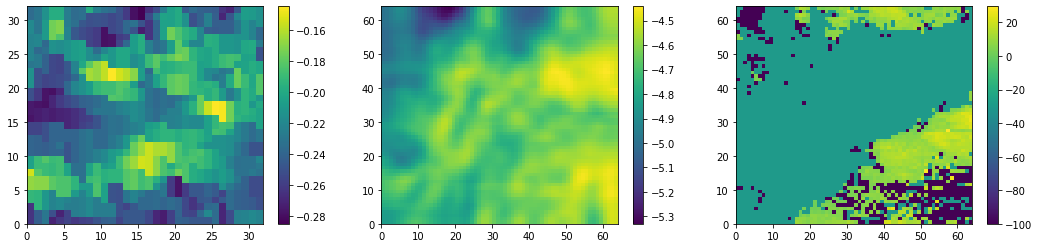

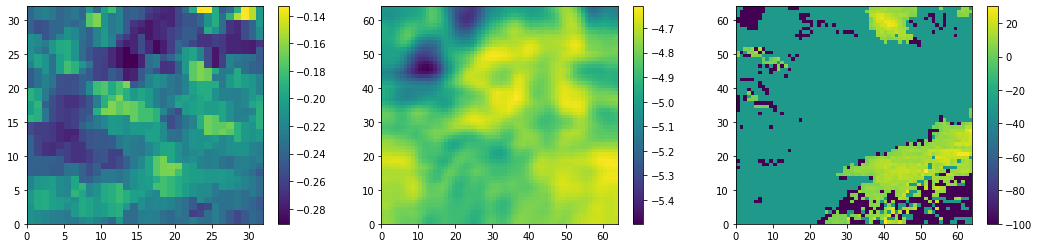

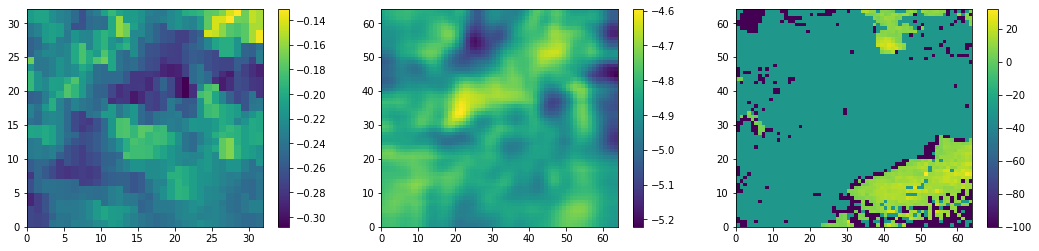

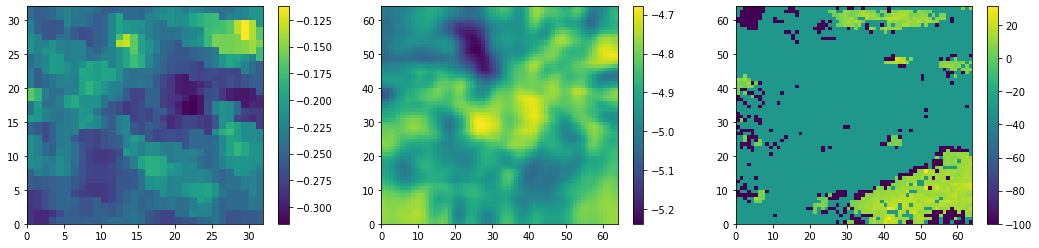

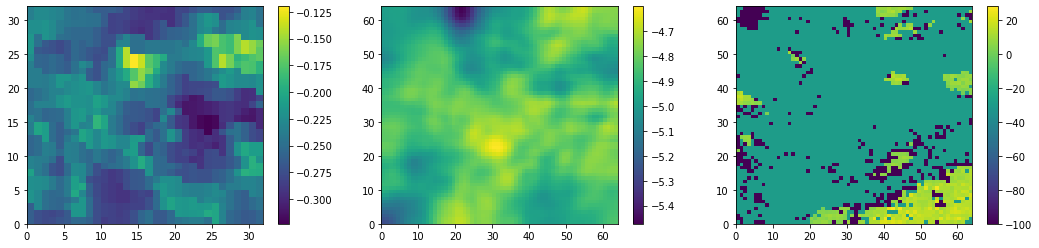

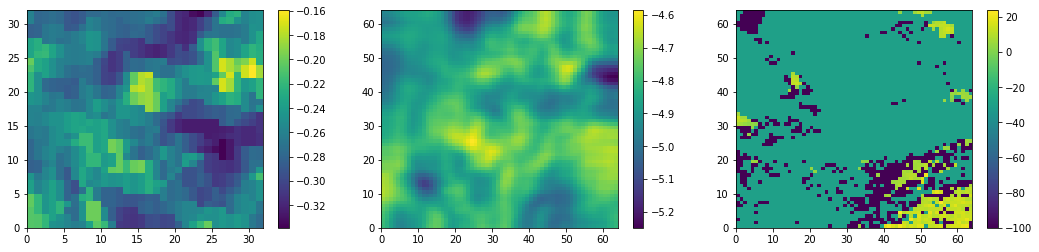

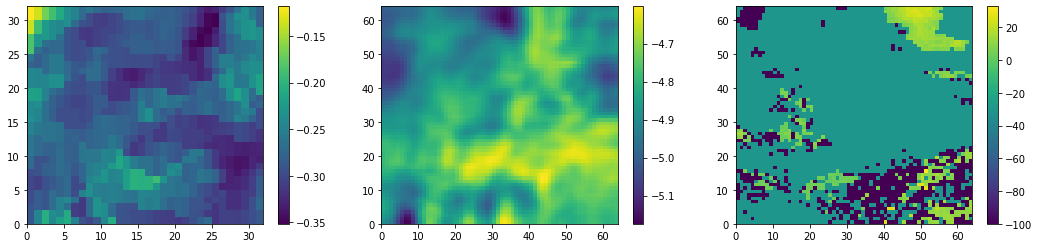

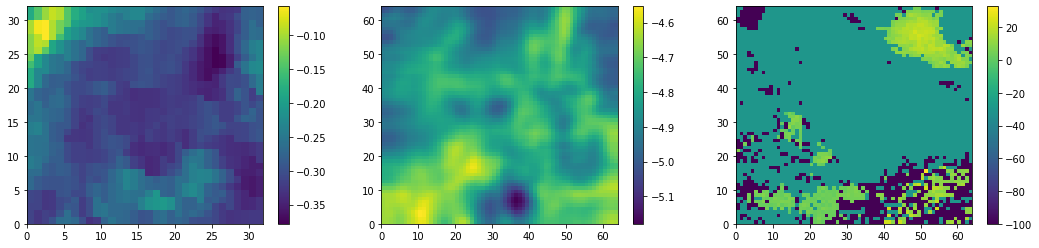

In [14]:
plot_results(x, y, y_pred)

In [166]:
rad = xr.load_dataset("/home/simonpf/data_3/cimr/training_data/radar/radar_20200510_04_00.nc")
geo = xr.load_dataset("/home/simonpf/data_3/cimr/training_data/geo/seviri_20200510_04_00.nc")

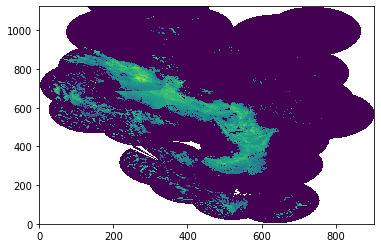

In [167]:
plt.pcolormesh(rad.dbz)

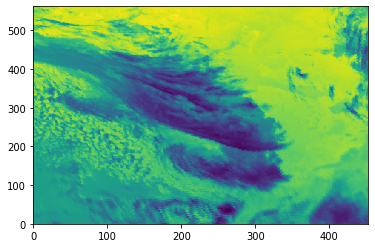

In [168]:
plt.pcolormesh(geo.geo_10.data)

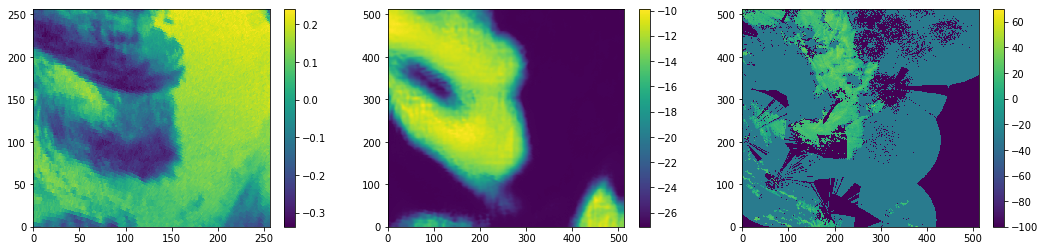

In [169]:
f, axs = plt.subplots(1, 3, figsize=(18, 4))

ind = 0
ax = axs[0]
m = ax.pcolormesh(x["geo"][ind, -1])
plt.colorbar(m, ax=ax)

ax = axs[1]
m = ax.pcolormesh(y_pred[ind])
plt.colorbar(m, ax=ax)

ax = axs[2]
m = ax.pcolormesh(y[ind])
plt.colorbar(m, ax=ax)


In [23]:
model

__QuantnnMixin__(
  (down_stages): ModuleList(
    (0): DownsamplingStage(
      (0): DownsamplingBlock(
        (0): BatchNorm2d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Conv2d(11, 16, kernel_size=(2, 2), stride=(2, 2))
      )
      (1): ConvNextBlock(
        (body): Sequential(
          (0): SymmetricPadding()
          (1): SeparableConv(
            (0): Conv2d(16, 16, kernel_size=(7, 7), stride=(1, 1), groups=16)
            (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1))
          )
          (2): GELU(approximate=none)
          (3): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
        )
        (projection): Identity()
      )
      (2): ConvNextBlock(
        (body): Sequential(
          (0): SymmetricPadding()
          (1): SeparableConv(
            (0): Conv2d(16, 16, kernel_size=(7, 7), stride=(1, 1), groups=16)
         

In [22]:
y[3].min()

tensor(-100.)

In [2]:
from cimr.models import CIMRSmolSequenceModel
from quantnn.qrnn import QRNN

quantiles = np.linspace(0, 1, 66)[1:-1]
model = CIMRSmolSequenceModel(64)
qrnn = QRNN(quantiles=quantiles, model=model)

In [3]:
from torch.utils.data import DataLoader

start_time = np.datetime64("2020-05-01T00:00:00")
end_time = np.datetime64("2020-05-10T00:00:00")
training_data = CIMRSequenceDataset(
    "/home/simonpf/data_3/cimr/training_data/",
    start_time=start_time,
    end_time=end_time,
    sequence_length=6,
    window_size=32
)
training_loader = DataLoader(training_data, num_workers=8, batch_size=1)
start_time = np.datetime64("2020-05-10T00:00:00")
end_time = np.datetime64("2020-05-11T00:00:00")
validation_data = CIMRSequenceDataset(
    "/home/simonpf/data_3/cimr/training_data/",
    start_time=start_time,
    end_time=end_time,
    sequence_length=6,
    window_size=32
)
validation_loader = DataLoader(validation_data, num_workers=4, batch_size=1)

In [ ]:
qrnn.train(
    training_data=training_loader,
    validation_data=validation_loader,
    n_epochs=5,
    device="cuda"
)

/home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
/usr/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/rasterio/../../.././libtiledb.so.2.8)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
/usr/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/rasterio/../../.././libtiledb.so.2.8)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
/usr/lib/x86_64-linux-gnu/libstdc++.so

Output()

In [7]:
x, y = next(iter(training_loader))

/home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
/usr/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/rasterio/../../.././libtiledb.so.2.8)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
/usr/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/rasterio/../../.././libtiledb.so.2.8)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


0.7908782958984375


/home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
/usr/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/rasterio/../../.././libtiledb.so.2.8)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


0.6724395751953125
0.933624267578125


/home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
/usr/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/rasterio/../../.././libtiledb.so.2.8)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


0.9576873779296875
0.7801666259765625
0.9515838623046875


In [17]:
from hydronn.
training_data[0]

/home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
/usr/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/rasterio/../../.././libtiledb.so.2.8)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


0.073974609375
0.84136962890625


([{'geo': tensor([[[-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000],
            [-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000],
            [-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000],
            ...,
            [-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000],
            [-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000],
            [-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000]],
   
           [[-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000],
            [-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000],
            [-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000],
            ...,
            [-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000],
            [-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000],
            [-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000]],
   
           [[-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.500

In [16]:
len(x[0]["geo"])

4

In [8]:
qrnn.model.to("cpu")
y_pred = qrnn.model(x)

In [10]:
y_pred.shape

torch.Size([4, 24, 256, 256])

In [10]:
x, y = next(iter(training_loader))

/home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
/usr/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/rasterio/../../.././libtiledb.so.2.8)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
/usr/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/rasterio/../../.././libtiledb.so.2.8)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/home/simonpf/miniconda3/envs/cimr/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
/usr/lib/x86_64-linux-gnu/libstdc++.so

In [11]:
x

{'geo': tensor([[[[-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000],
           [-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000],
           [-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000],
           ...,
           [-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000],
           [-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000],
           [-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000]],
 
          [[-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000],
           [-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000],
           [-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000],
           ...,
           [-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000],
           [-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000],
           [-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000]],
 
          [[-1.5000, -1.5000, -1.5000,  ..., -1.5000, -1.5000, -1.5000],
      